In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("./data_paper/Swelling25C.csv")
data.head()

,Unnamed: 0,Cycle,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV,DVSOC50,SOH
0,0,1,22.2,5.9,16.23353,2.70701,15.8590,0.9436,0.01880,0.000152,2.5251,3.2471,1.00000
1,1,2,22.2,6.0,16.21130,2.70088,15.9812,1.0882,0.02133,0.000123,2.5237,3.2471,1.00236
2,2,3,22.3,6.1,16.19200,2.69550,16.0886,1.2150,0.02195,0.000143,2.5245,3.2473,1.00236
3,3,4,22.2,6.1,16.17562,2.69086,16.1810,1.3236,0.02191,0.000166,2.5261,3.2471,1.00222
4,4,5,22.2,6.0,16.16217,2.68697,16.2586,1.4144,0.02214,0.000186,2.5251,3.2473,1.00196


In [3]:
print(data['Cycle'].max())

493


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def bisquare(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**2)**2)
        else:
            res.append(0)
    return np.array(res)

def tricube(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**3)**3)
        else:
            res.append(0)
    return np.array(res)

def get_n_th_distance(x,y,n):
    y=np.array(y)
    distance=abs(y-x)
    distance=np.sort(distance)
    return distance[n-1]


In [6]:
x=np.array([9,8,7,40,100,4,1000,2])
print(x)
l=np.partition(x,3)
print(l)
k=np.partition(x,3)[3]
print(k)
# 무조건 (array, 몇개의 작은 수 뽑을 건지) 지정하고 뽑은 작은 수를 왼쪽에 무작위로
# 배열한 다음 [] 안의 숫자는 그 배열에서 []의 위치의 숫자를 반환
# 0 base라서 [3]은 네번째 숫자이다

t=np.where(x<3)[0]
print(t)

[   9    8    7   40  100    4 1000    2]
[   2    4    7    8    9  100 1000   40]
8
[7]


In [7]:
import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)
    
    


NameError: name 'y' is not defined

In [17]:
t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    


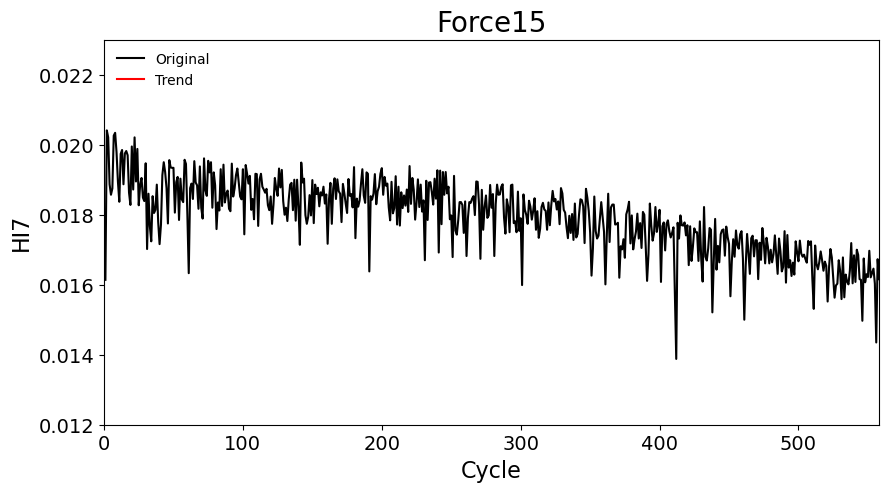

In [18]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023,0.001)
plt.show()




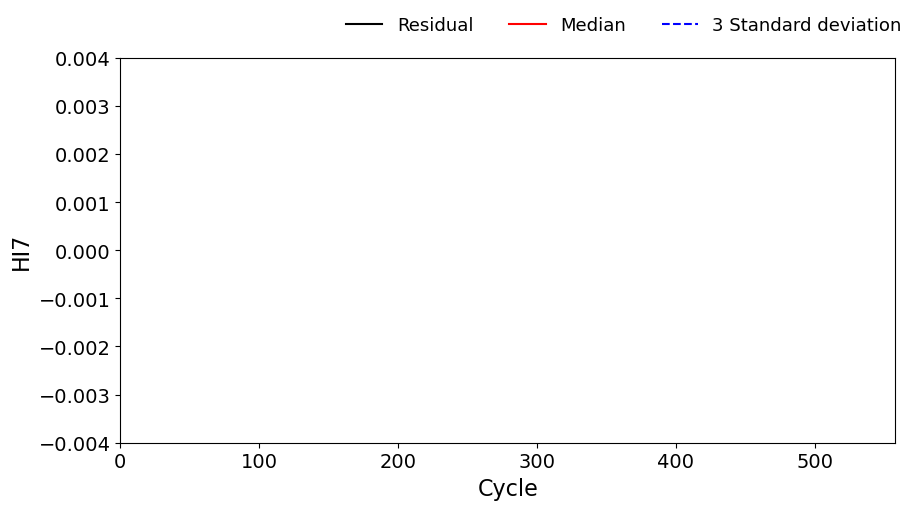

In [19]:
x= data['Cycle']
y_origin= data['CVIS (dt)']
y_trend= fitted_value

y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(-0.004,0.004,0.002)
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()





In [20]:
median=np.median(y_res)
std=np.std(y_res)
print(median)
print(std)
print(y_res.shape)
y_origin_sel=data.loc[data['Cycle']==3,'max.'].iloc[0]
print(y_origin_sel)
data_res=list(zip(x,y_res))
x_values = [y_res for x, y_res in data_res if x == 1]
# x에 대응하는 y_res를 출력해라. 이때 y_res는 data_res에서 x==1일때이다. 
print(x_values)
# 1부터 시작
print(len(y_res))

-2.504494540618914
0.012764515890027934
(558,)
1357.7
[-2.4875972283868717]
558


In [21]:
denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if (-3)*std<=t<=3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS (dt)'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'CVIS (dt)'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'CVIS (dt)'].iloc[0]
        else :
            denoised_num=closer_number(median,cycle)
            denoised_val=data.loc[data['Cycle']==denoised_num,'CVIS (dt)'].iloc[0]
    denoised.append(denoised_val)
    cycle +=1

y_denoised=np.array(denoised)


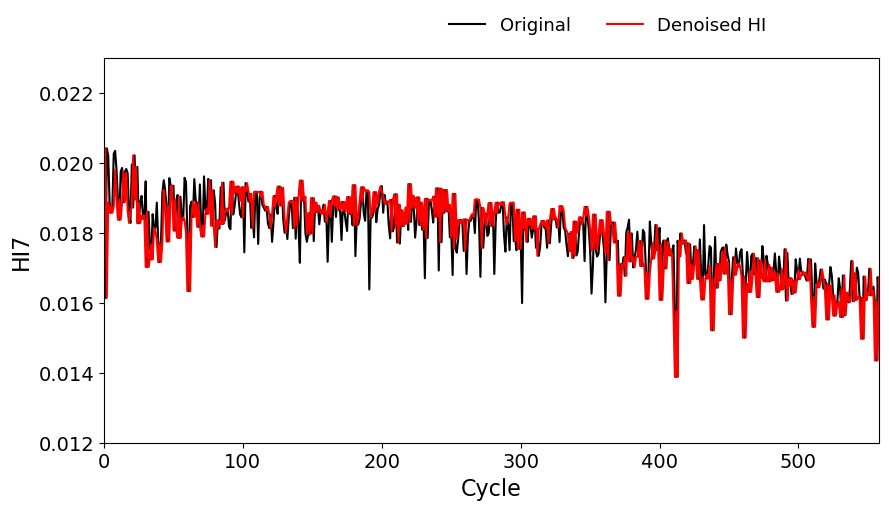

In [22]:

plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.ylim(0.012,0.023)

plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()



In [23]:
n=np.median([6,7])
print(n)

6.5


(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            WLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:58:39   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -67.3805      8.662     -7.779      0.0

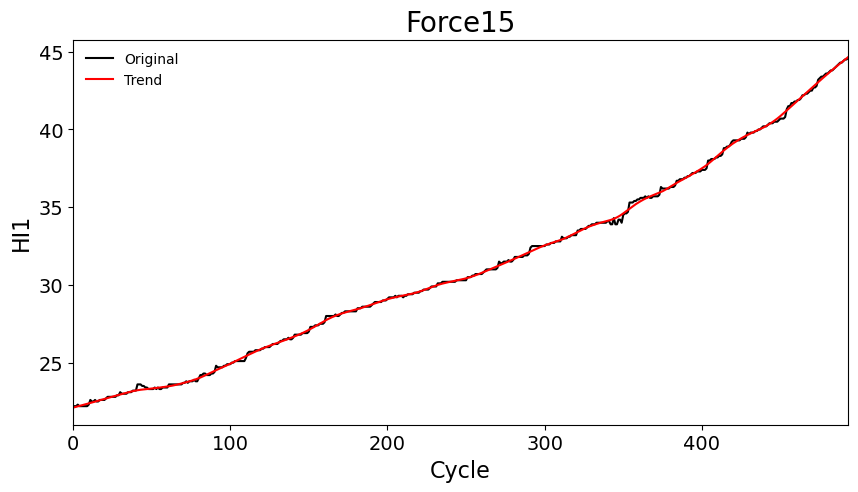

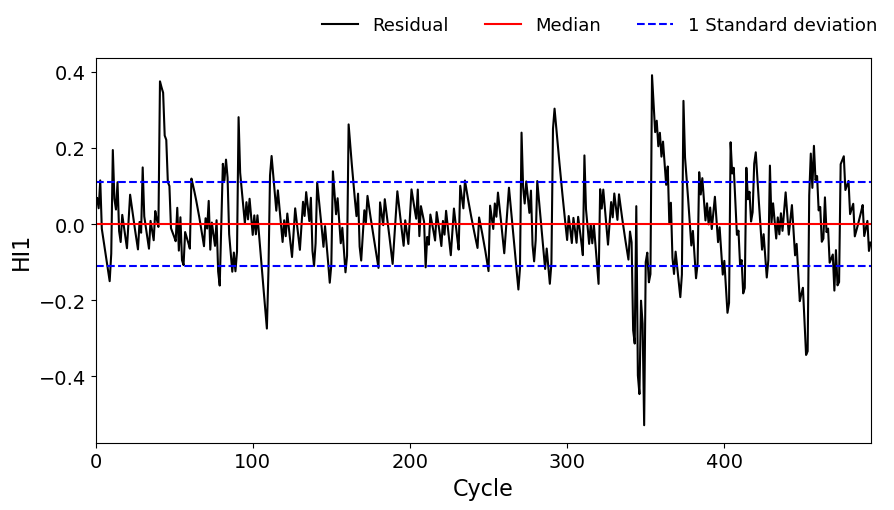

3
8
9
11
30
41
42
43
44
45
46
61
78
79
81
82
83
84
87
89
91
92
106
107
108
109
110
111
112
113
149
151
159
161
162
163
180
210
235
250
268
269
270
271
274
281
286
289
291
292
293
294
295
296
311
320
342
343
345
346
347
348
349
352
353
354
355
356
357
358
359
360
361
362
364
368
370
371
372
373
374
375
376
382
384
386
399
401
402
403
404
405
406
412
413
414
419
420
421
427
429
447
448
449
450
451
452
453
455
457
458
459
470
472
473
474
475
476
479


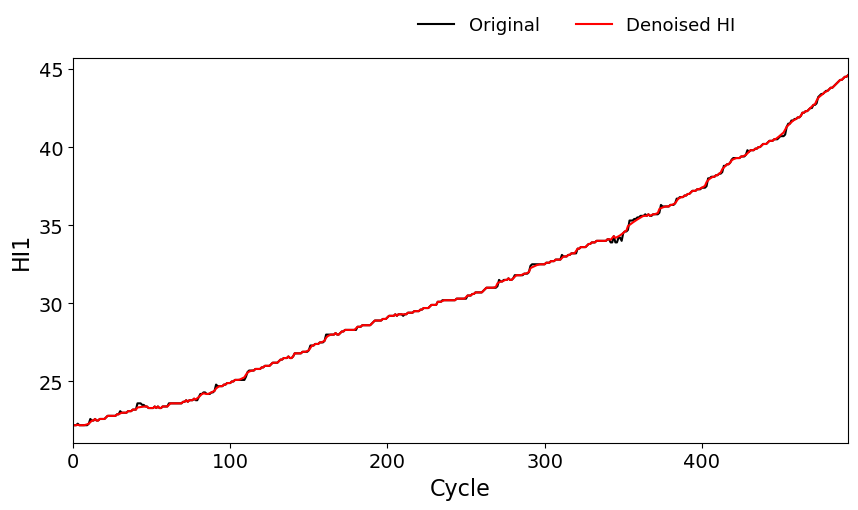

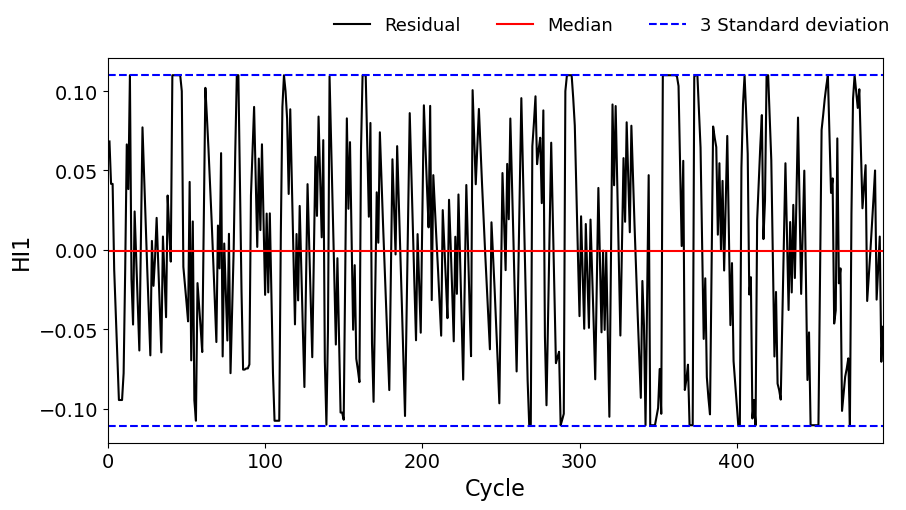

In [51]:
##############################################################
##############################################################

x= data['Cycle']
y= data['max.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    #t=y_res[cycle-1]
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.'].iloc[0]
    else :
        print(cycle)
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'max.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'max.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_max=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_max,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_max-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_max-y_trend
for t in y_res_2:
    if t>(1*std) or t<-(1*std):
        print("outlier")
    else:
        pass




(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            WLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.576e+04
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:58:46   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.1177      7.042    -10.384      0.0

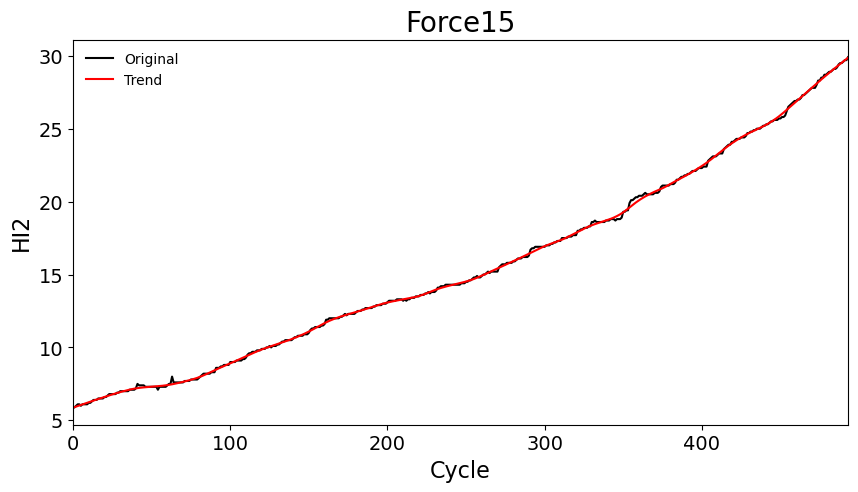

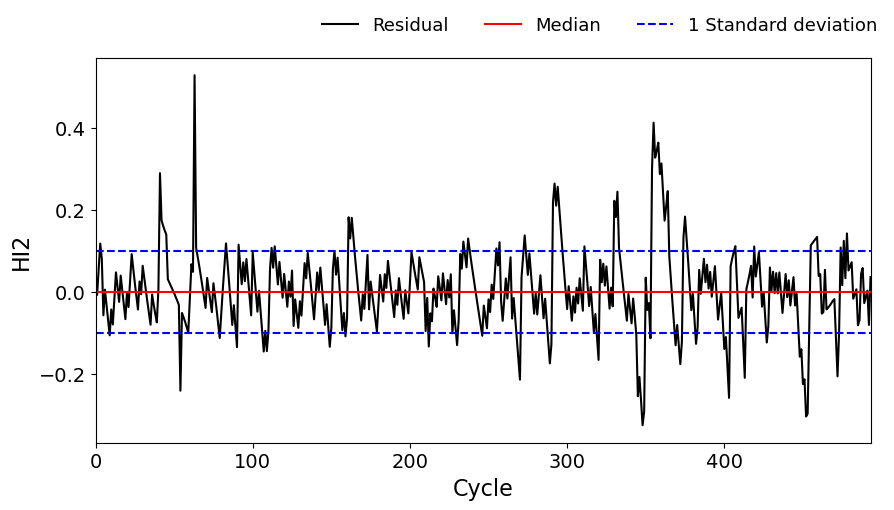

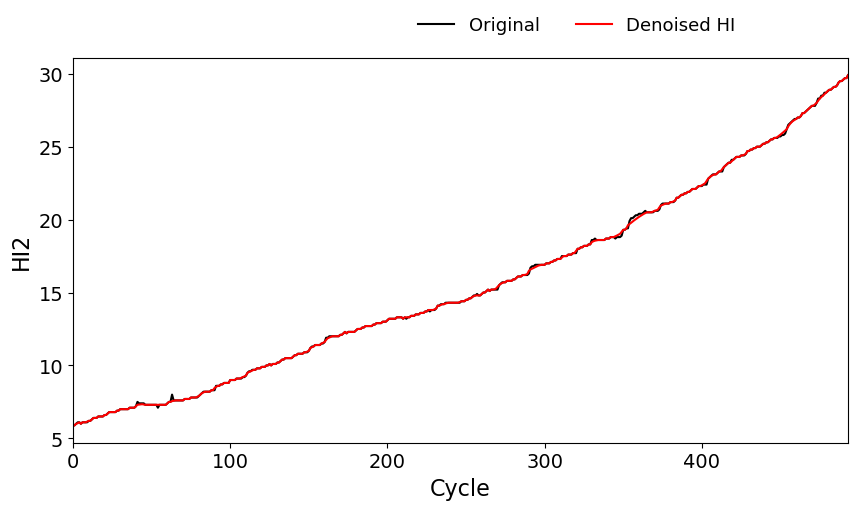

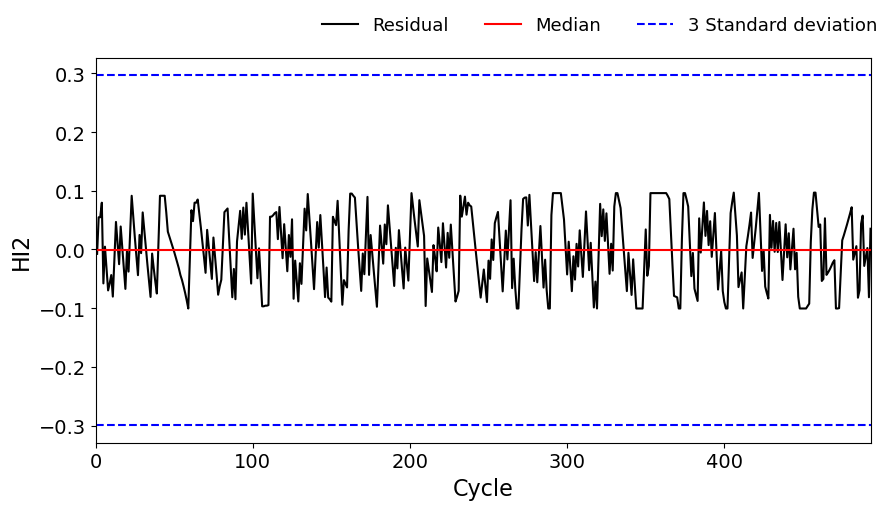

In [52]:
x= data['Cycle']
y= data['min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'min.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'min.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_min=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_min,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_min-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_min-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass



(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            WLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.35e-49
Time:                        06:58:52   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8929      4.188      1.168      0.2

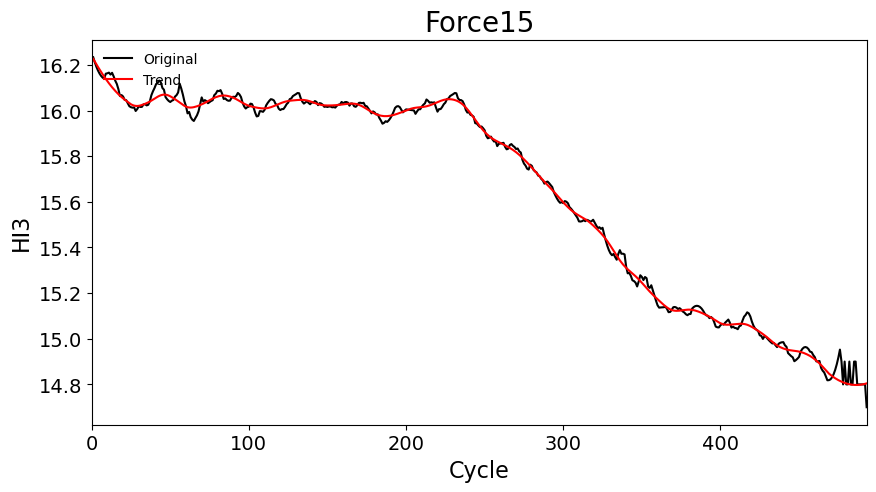

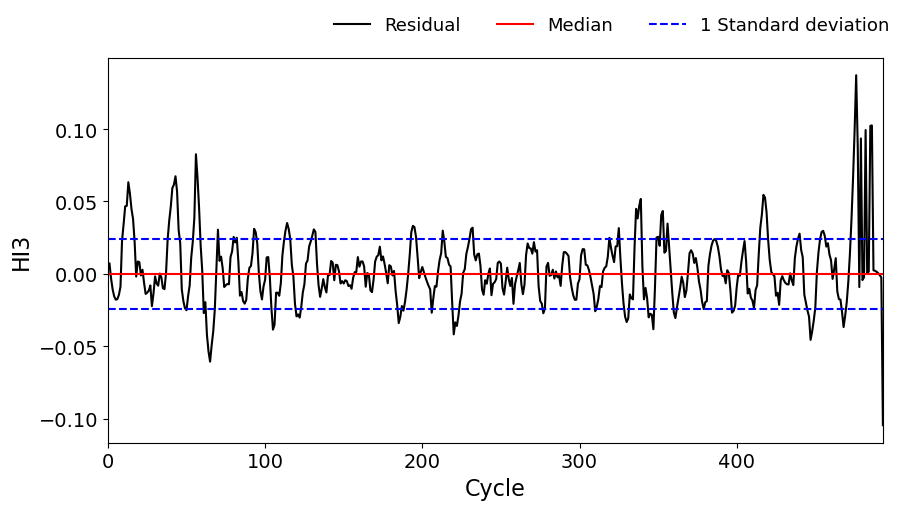

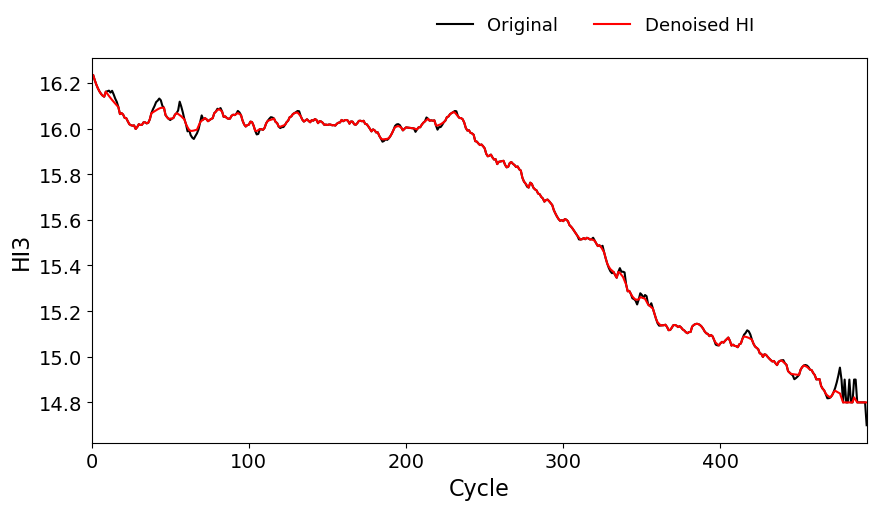

In [53]:
x= data['Cycle']
y= data['max.-min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.-min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.-min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
           
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_maxmin=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_maxmin,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            WLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           3.91e-50
Time:                        06:58:57   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0788      1.643      5.525      0.0

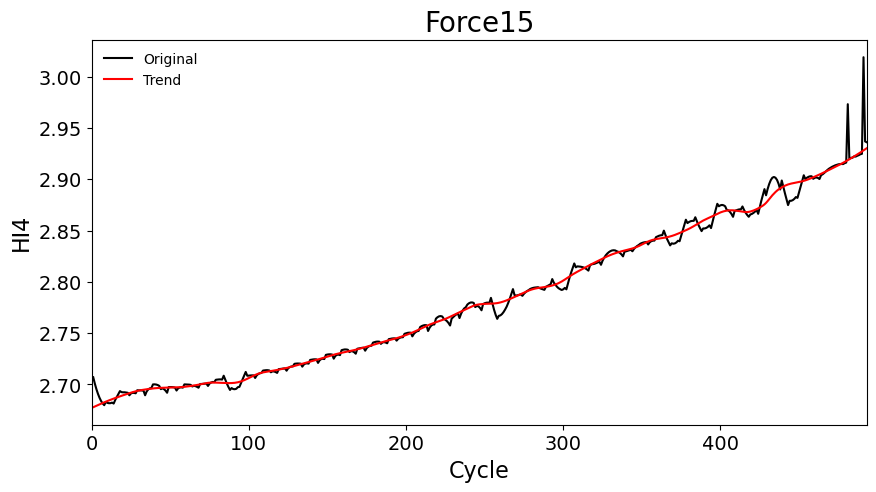

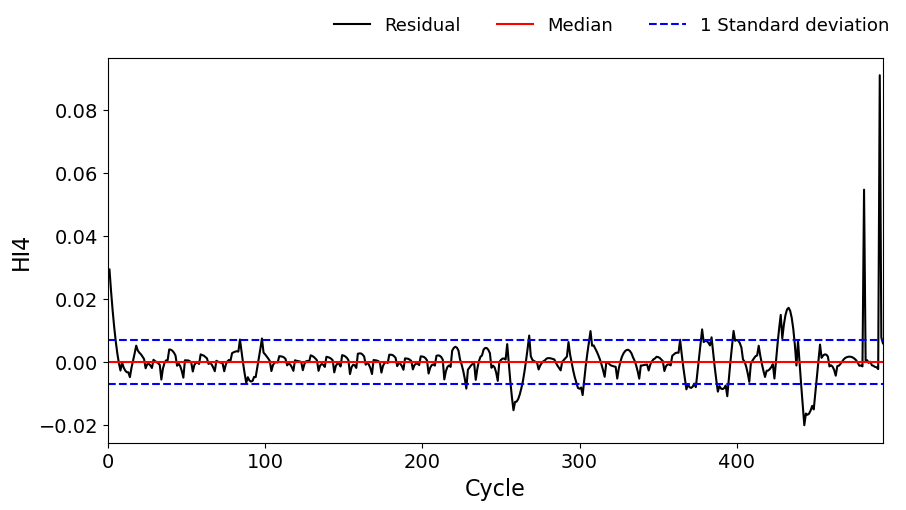

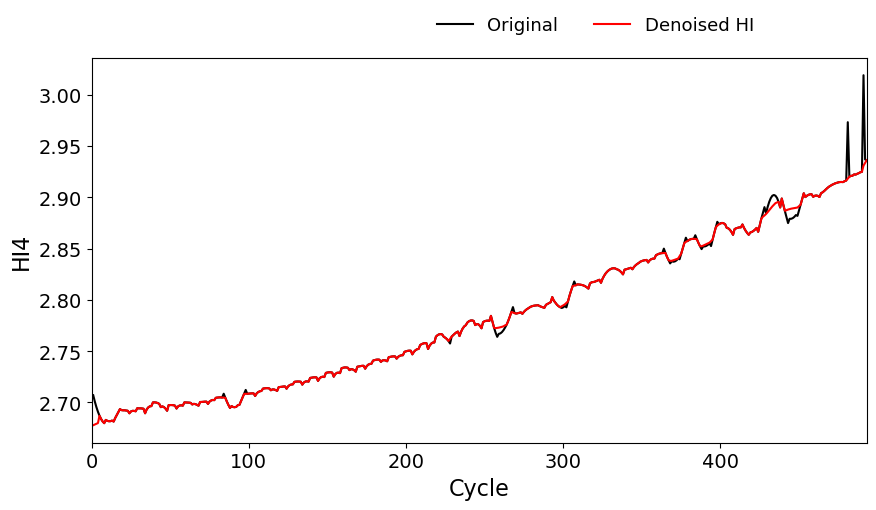

In [54]:
x= data['Cycle']
y= data['CIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_civ=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_civ,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            WLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           9.19e-75
Time:                        06:59:05   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -167.5401     33.302     -5.031      0.0

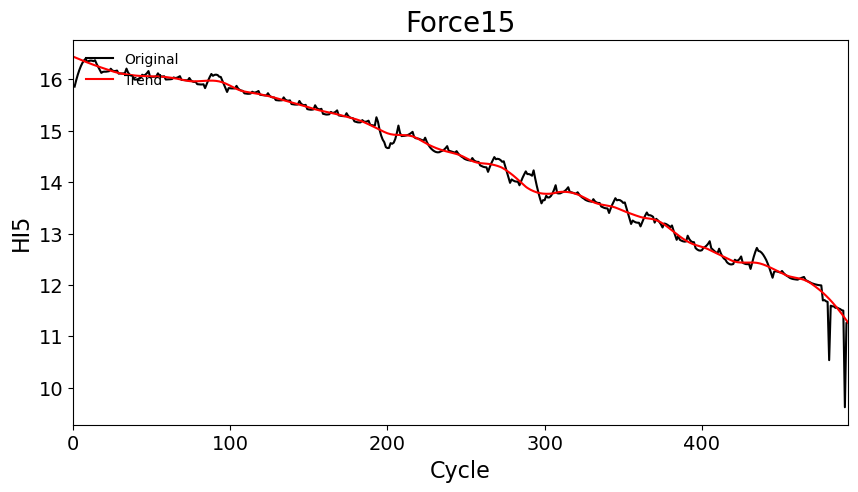

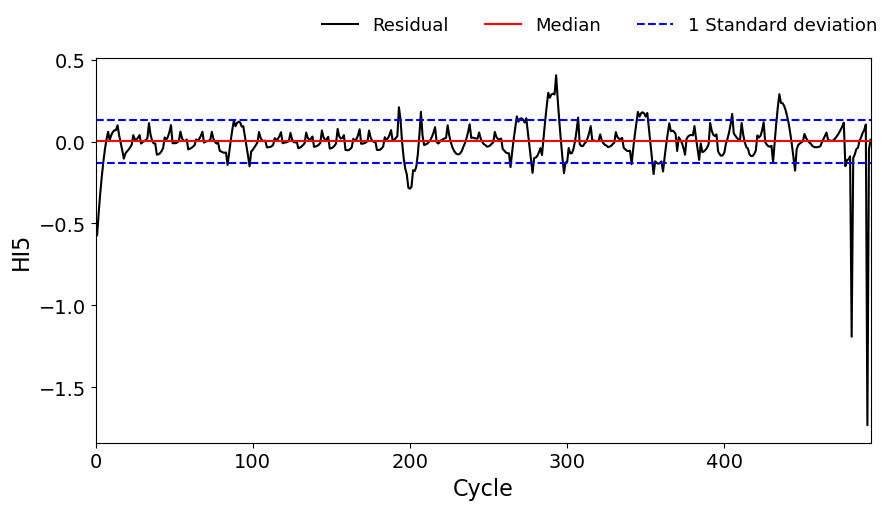

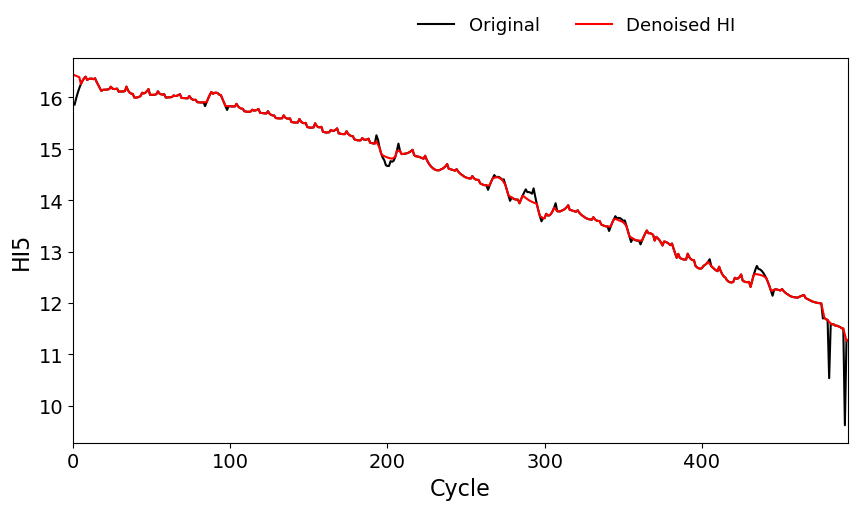

In [55]:
x= data['Cycle']
y= data['CCVIS']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVIS']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)
(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            WLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.53e-55
Time:                        06:59:11   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.1004     10.536     14.911      0.0

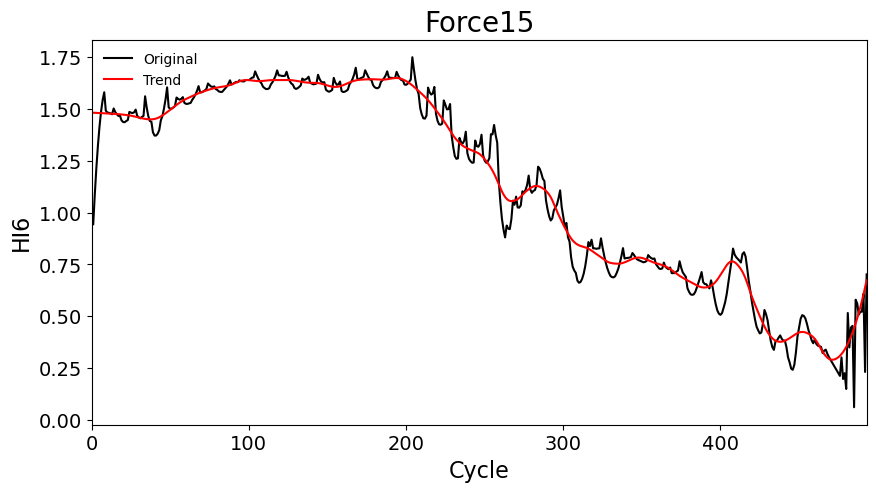

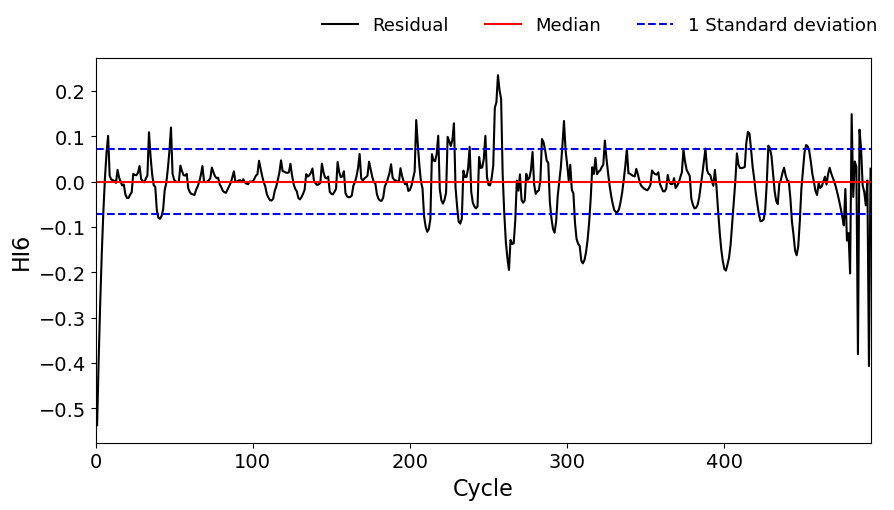

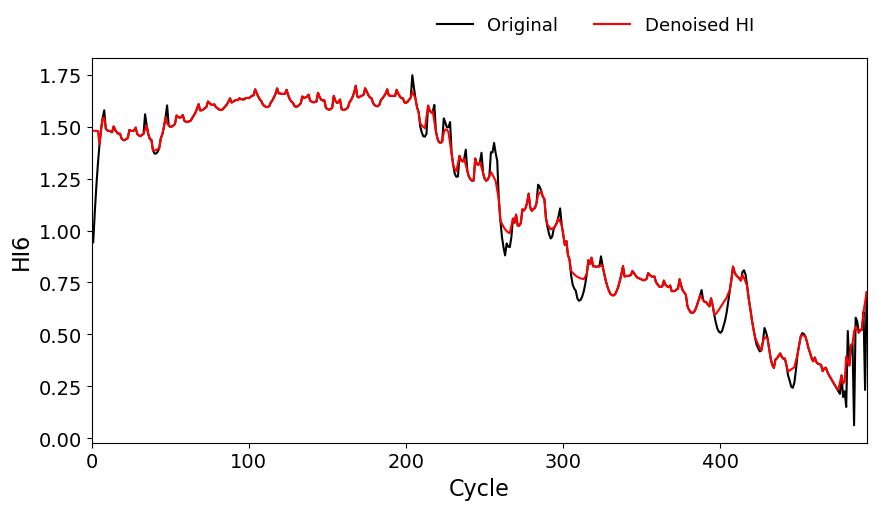

In [56]:
x= data['Cycle']
y= data['CCVES']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVES']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)
(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            WLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     70.61
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.13e-27
Time:                        06:59:20   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2688      0.051     -5.265      0.0

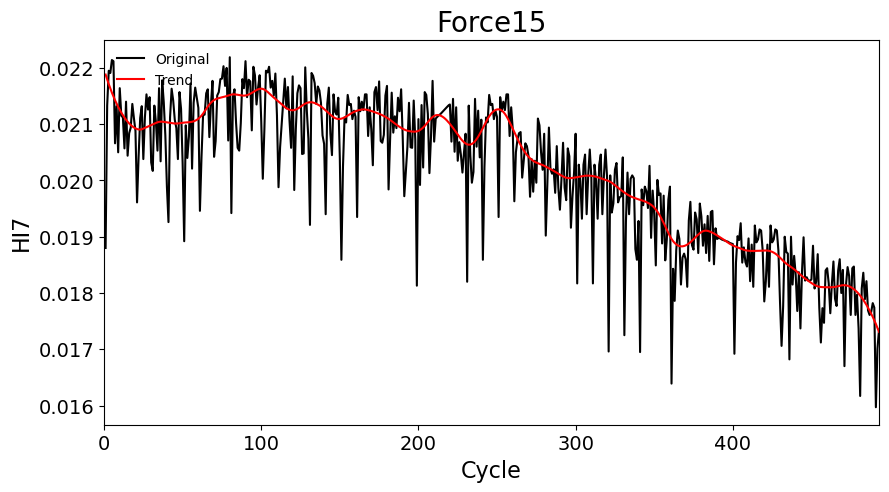

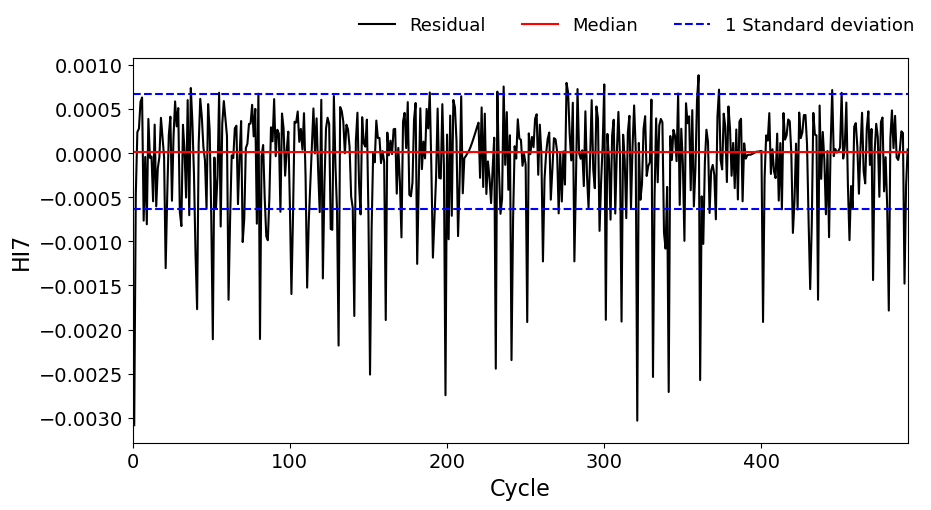

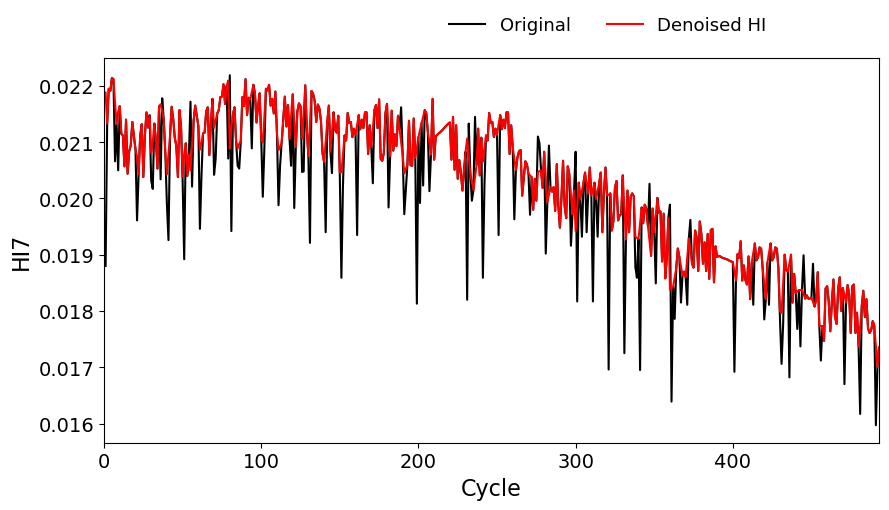

In [57]:
x= data['Cycle']
y= data.iloc[0:,8]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,8]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)
(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.074
Model:                            WLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     19.57
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.64e-09
Time:                        06:59:28   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.004     -0.942      0.3

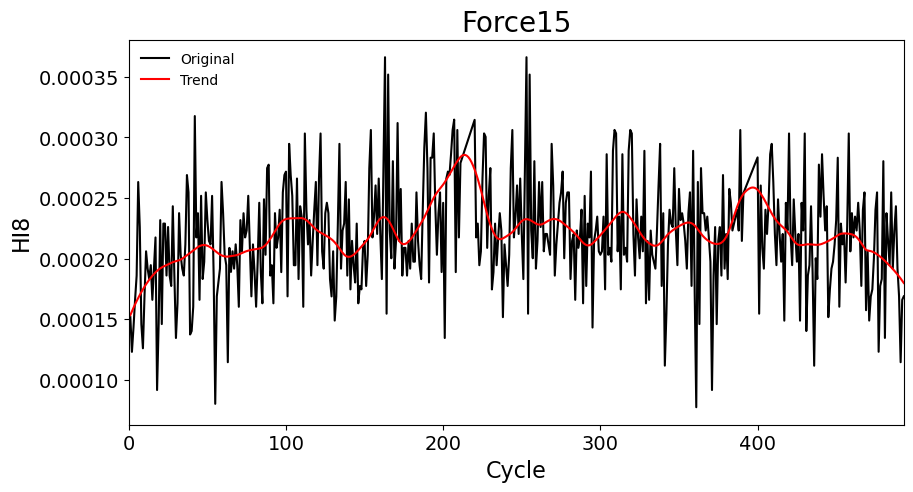

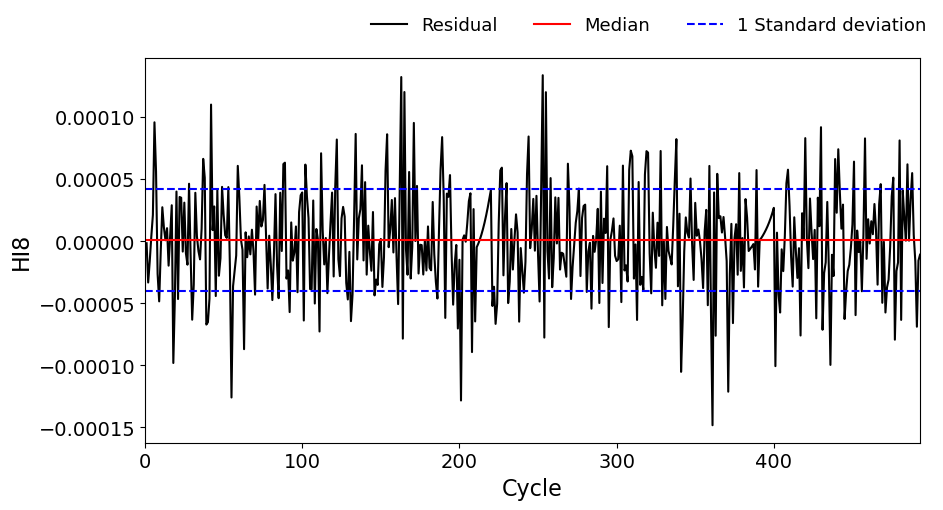

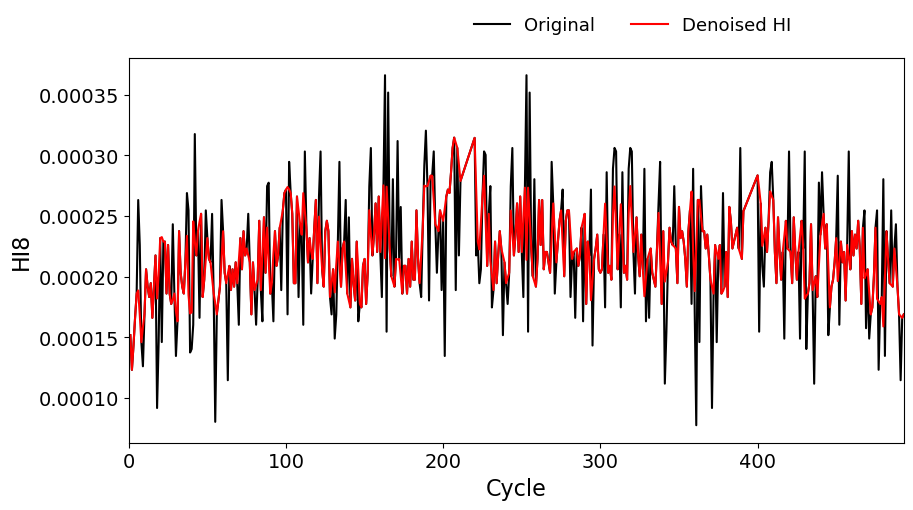

In [58]:
x= data['Cycle']
y= data.iloc[0:,9]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,9]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(493,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            WLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1874.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.63e-230
Time:                        06:59:34   Log-Likelihood:                   -inf
No. Observations:                 493   AIC:                               inf
Df Residuals:                     490   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6011      0.204      7.848      0.0

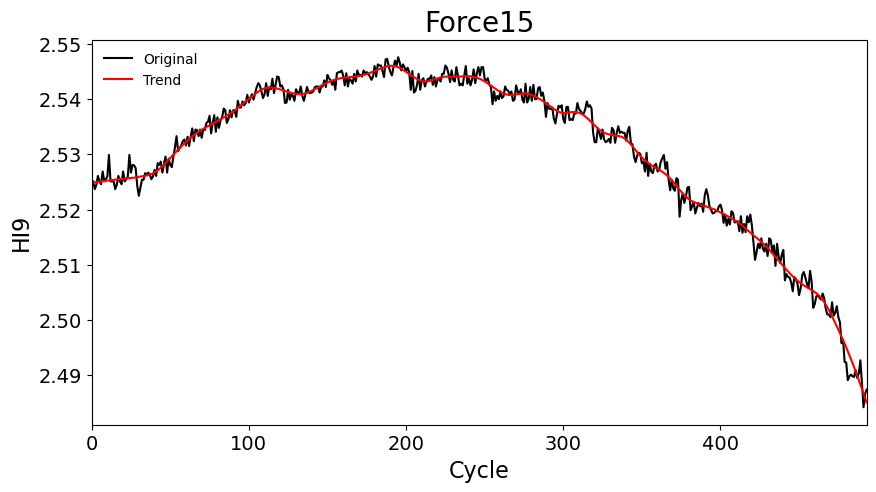

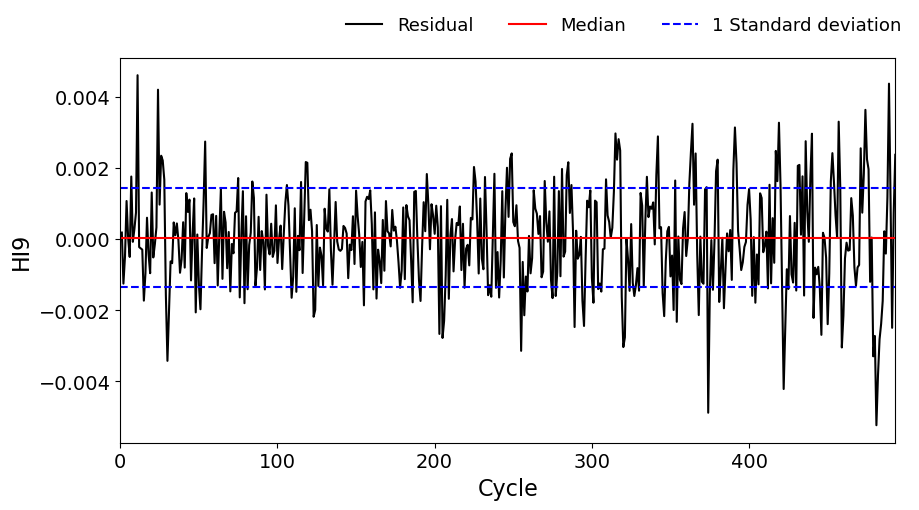

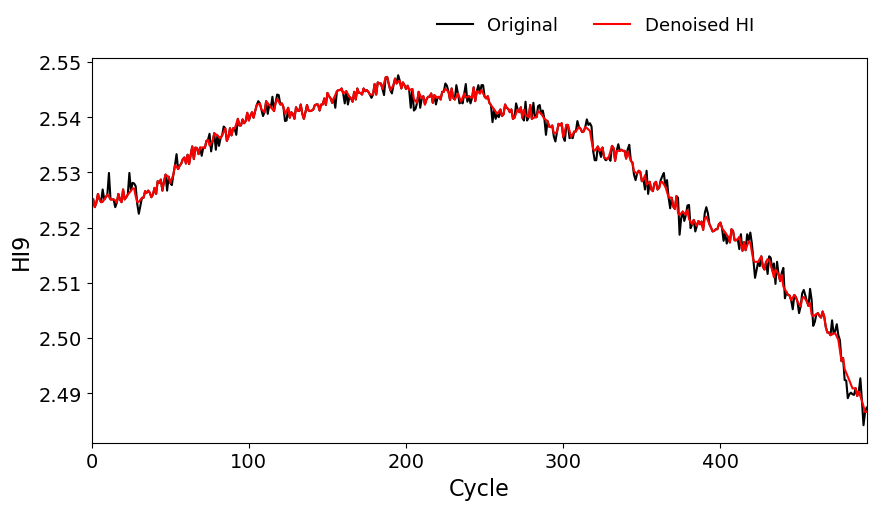

In [59]:
x= data['Cycle']
y= data['DIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['DIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'DIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_DIV=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_DIV,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


In [60]:
df = pd.DataFrame({'HI1': y_denoised_max, 'HI2': y_denoised_min, 'HI3': y_denoised_maxmin,
                  'HI4': y_denoised_civ, 'HI5': y_denoised_CCVIS, 'HI6': y_denoised_CCVES,
                  'HI7': y_denoised_CVIS, 'HI8': y_denoised_CVES, 'HI9': y_denoised_DIV})

print(df)

           HI1        HI2       HI3       HI4        HI5       HI6       HI7  \
0    22.200000   5.900000  16.23353  2.677747  16.431229  1.480827  0.021882   
1    22.200000   6.000000  16.21130  2.678450  16.418303  1.480508  0.021330   
2    22.226915   6.037619  16.19200  2.679147  16.405433  1.480161  0.021950   
3    22.200000   6.100000  16.17562  2.679837  16.392632  1.479790  0.021910   
4    22.200000   6.000000  16.16217  2.686970  16.258600  1.414400  0.022140   
..         ...        ...       ...       ...        ...       ...       ...   
488  44.300000  29.500000  14.80000  2.924400  11.508000  0.522000  0.017820   
489  44.400000  29.600000  14.80000  2.924800  11.500000  0.522000  0.017740   
490  44.500000  29.700000  14.80000  2.930851  11.381388  0.608000  0.017373   
491  44.500000  29.700000  14.80000  2.933529  11.262000  0.654115  0.017010   
492  44.600000  29.900000  14.80000  2.936100  11.278000  0.702000  0.017350   

          HI8       HI9  
0    0.000152

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(df)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_norm_denoised = pd.DataFrame(data_normalized, columns=df.columns)

# 정규화된 데이터 확인
data_norm_denoised.head()

,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
0,0.000000,0.000000,1.000000,0.000000,1.000000,0.851910,0.949701,0.149331,0.634267
1,0.000000,0.004167,0.984494,0.002721,0.997499,0.851692,0.842105,0.000000,0.611203
2,0.001202,0.005734,0.971032,0.005418,0.995010,0.851455,0.962963,0.104665,0.624382
3,0.000000,0.008333,0.959607,0.008088,0.992533,0.851201,0.955166,0.223999,0.650741
4,0.000000,0.004167,0.950225,0.035698,0.966605,0.806530,1.000000,0.328336,0.634267


In [63]:
data=pd.read_csv("./data_paper/Swelling25C.csv")

print(data.shape)

# data가 pandas DataFrame이고, shape이 (558, 13)이라고 가정합니다.

# 'cycle', 'soh', 'DVSOC50' 열을 제외하고 나머지 데이터만 유지
# 여기서 'cycle'이 2개 있다고 하셨으니, 구체적인 열 이름이 필요할 수 있습니다.
# 예를 들어, 'cycle1', 'cycle2' 같이 구분이 되어 있다면 아래와 같이 작성합니다.
data_reduced = data.drop(['Unnamed: 0', 'Cycle', 'SOH', 'DVSOC50'], axis=1)

# 결과 확인
print(data_reduced.shape)  # 이제 (558, 9)가 되어야 합니다.
data_reduced.head()

(493, 13)
(493, 9)


,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV
0,22.2,5.9,16.23353,2.70701,15.8590,0.9436,0.01880,0.000152,2.5251
1,22.2,6.0,16.21130,2.70088,15.9812,1.0882,0.02133,0.000123,2.5237
2,22.3,6.1,16.19200,2.69550,16.0886,1.2150,0.02195,0.000143,2.5245
3,22.2,6.1,16.17562,2.69086,16.1810,1.3236,0.02191,0.000166,2.5261
4,22.2,6.0,16.16217,2.68697,16.2586,1.4144,0.02214,0.000186,2.5251


In [64]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(data_reduced)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_normalized = pd.DataFrame(data_normalized, columns=data_reduced.columns)

# 정규화된 데이터 확인
data_normalized.head()

,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV
0,0.000000,0.000000,1.000000,0.080354,0.919827,0.522832,0.454984,0.257280,0.645110
1,0.000000,0.004167,0.985504,0.062284,0.937843,0.608587,0.861736,0.158193,0.623028
2,0.004464,0.008333,0.972919,0.046426,0.953677,0.683786,0.961415,0.227642,0.635647
3,0.000000,0.008333,0.962237,0.032749,0.967300,0.748191,0.954984,0.306825,0.660883
4,0.000000,0.004167,0.953467,0.021282,0.978740,0.802040,0.991961,0.376056,0.645110


In [65]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import os
import random


def build_autoencoder(input_dim, encoding_dim):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 레이어: 입력을 encoding_dim 차원으로 압축, He 초기화 사용
    encoded = Dense(encoding_dim[0], activation='elu')(input_layer)
    encoded = Dense(encoding_dim[1], activation='elu')(encoded)
    
    # 디코더 레이어: encoding_dim 차원을 다시 입력 차원으로 복원, He 초기화 사용
    decoded = Dense(encoding_dim[0], activation='elu')(encoded)
    decoded = Dense(input_dim, activation='elu')(decoded)
    
    # 오토인코더 모델 생성
    autoencoder = Model(input_layer, decoded)
    
    # 인코더 모델 생성
    encoder = Model(input_layer, encoded)
    
    # 디코더 모델 생성
    encoded_input = Input(shape=(encoding_dim[1],))
    decoder_layer1 = autoencoder.layers[-2](encoded_input)
    decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
    decoder = Model(encoded_input, decoder_layer2)
    
    return autoencoder, encoder, decoder

# 모델 구축
input_dim = 9  # 입력 차원
encoding_dim = [6, 4]  # 인코더의 두 레이어에서의 차원
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 63        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [66]:
# data.shape는 (558, 9)입니다.

# 첫 277개 행을 훈련 데이터로 사용
X_train = data_norm_denoised
X_test=data_norm_denoised

# 모델 훈련
autoencoder.fit(X_train, X_train, epochs=400, batch_size=32,validation_data=(X_train,X_train))

# 테스트 데이터에 대한 재구성
reconstructed = autoencoder.predict(X_test)




Train on 493 samples, validate on 493 samples
Epoch 1/400
493/493 [==============================] - 1s 1ms/sample - loss: 0.4629 - val_loss: 0.4006
Epoch 2/400
493/493 [==============================] - 0s 103us/sample - loss: 0.3636 - val_loss: 0.3247
Epoch 3/400
493/493 [==============================] - 0s 103us/sample - loss: 0.3001 - val_loss: 0.2728
Epoch 4/400
493/493 [==============================] - 0s 95us/sample - loss: 0.2523 - val_loss: 0.2279
Epoch 5/400
493/493 [==============================] - 0s 101us/sample - loss: 0.2088 - val_loss: 0.1863
Epoch 6/400
493/493 [==============================] - 0s 112us/sample - loss: 0.1693 - val_loss: 0.1494
Epoch 7/400
493/493 [==============================] - 0s 95us/sample - loss: 0.1355 - val_loss: 0.1202
Epoch 8/400
493/493 [==============================] - 0s 85us/sample - loss: 0.1098 - val_loss: 0.0989
Epoch 9/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0920 - val_loss: 0.0851
Epoch 10/400
49

493/493 [==============================] - 0s 87us/sample - loss: 0.0057 - val_loss: 0.0056
Epoch 79/400
493/493 [==============================] - 0s 89us/sample - loss: 0.0056 - val_loss: 0.0056
Epoch 80/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0056 - val_loss: 0.0056
Epoch 81/400
493/493 [==============================] - 0s 87us/sample - loss: 0.0056 - val_loss: 0.0055
Epoch 82/400
493/493 [==============================] - 0s 81us/sample - loss: 0.0055 - val_loss: 0.0055
Epoch 83/400
493/493 [==============================] - 0s 89us/sample - loss: 0.0055 - val_loss: 0.0055
Epoch 84/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0054 - val_loss: 0.0054
Epoch 85/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0054 - val_loss: 0.0054
Epoch 86/400
493/493 [==============================] - 0s 91us/sample - loss: 0.0054 - val_loss: 0.0053
Epoch 87/400
493/493 [==============================] - 0s 85us/samp

493/493 [==============================] - 0s 81us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 156/400
493/493 [==============================] - 0s 73us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 157/400
493/493 [==============================] - 0s 73us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 158/400
493/493 [==============================] - 0s 75us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 159/400
493/493 [==============================] - 0s 73us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 160/400
493/493 [==============================] - 0s 81us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 161/400
493/493 [==============================] - 0s 77us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 162/400
493/493 [==============================] - 0s 71us/sample - loss: 0.0034 - val_loss: 0.0033
Epoch 163/400
493/493 [==============================] - 0s 73us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 164/400
493/493 [==============================] - 0s 

493/493 [==============================] - 0s 79us/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 233/400
493/493 [==============================] - 0s 79us/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 234/400
493/493 [==============================] - 0s 81us/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 235/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0024 - val_loss: 0.0023
Epoch 236/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0024 - val_loss: 0.0023
Epoch 237/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 238/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 239/400
493/493 [==============================] - 0s 79us/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 240/400
493/493 [==============================] - 0s 81us/sample - loss: 0.0023 - val_loss: 0.0023
Epoch 241/400
493/493 [==============================] - 0s 

493/493 [==============================] - 0s 83us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 310/400
493/493 [==============================] - 0s 95us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 311/400
493/493 [==============================] - 0s 84us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 312/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 313/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 314/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 315/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 316/400
493/493 [==============================] - 0s 83us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 317/400
493/493 [==============================] - 0s 85us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 318/400
493/493 [==============================] - 0s 

493/493 [==============================] - 0s 93us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 387/400
493/493 [==============================] - 0s 89us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 388/400
493/493 [==============================] - 0s 91us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 389/400
493/493 [==============================] - 0s 93us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 390/400
493/493 [==============================] - 0s 95us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 391/400
493/493 [==============================] - 0s 91us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 392/400
493/493 [==============================] - 0s 89us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 393/400
493/493 [==============================] - 0s 93us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 394/400
493/493 [==============================] - 0s 95us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 395/400
493/493 [==============================] - 0s 

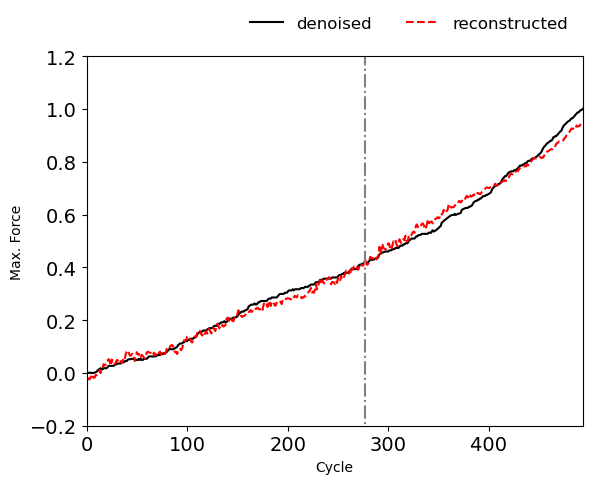

In [67]:

y= reconstructed[:,0]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI1']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

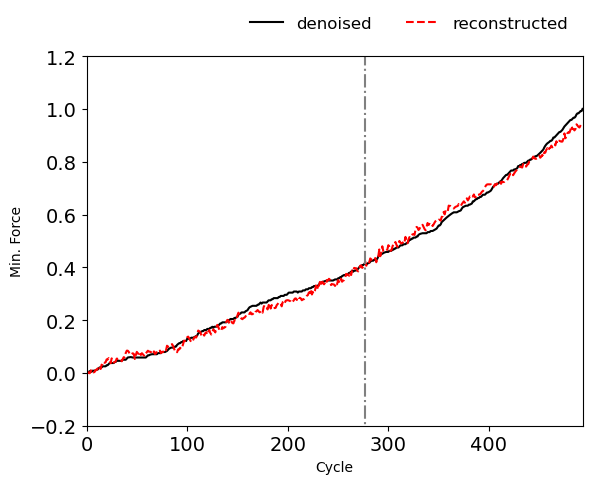

In [68]:
y= reconstructed[:,1]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI2']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

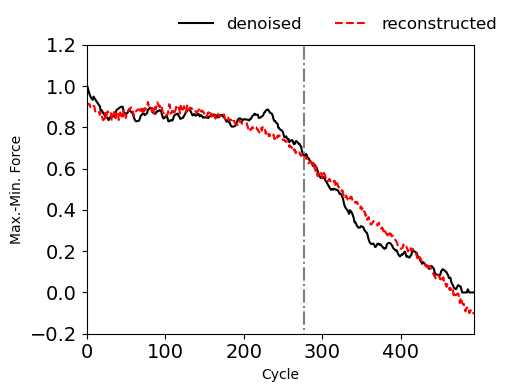

In [69]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,2]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI3']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max.-Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

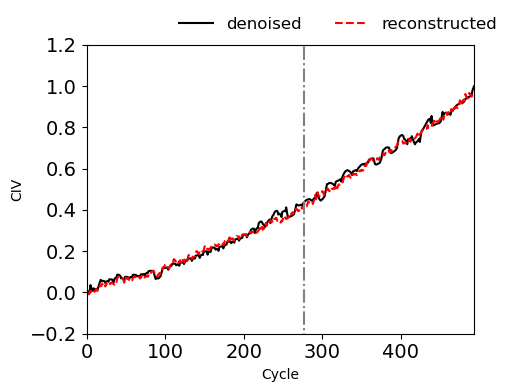

In [70]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,3]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI4']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("CIV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

<Figure size 500x375 with 0 Axes>

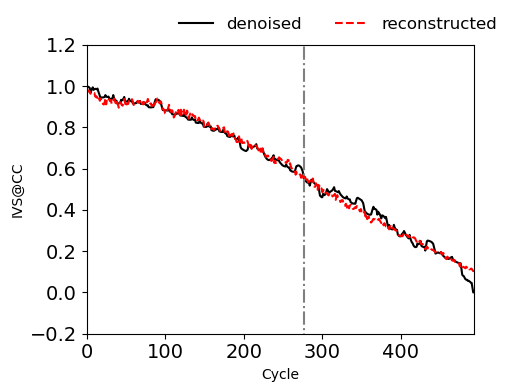

In [71]:
plt.figure(figsize=(5,3.75))
plt.figure(figsize=(5,3.75))
y= reconstructed[:,4]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI5']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("IVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

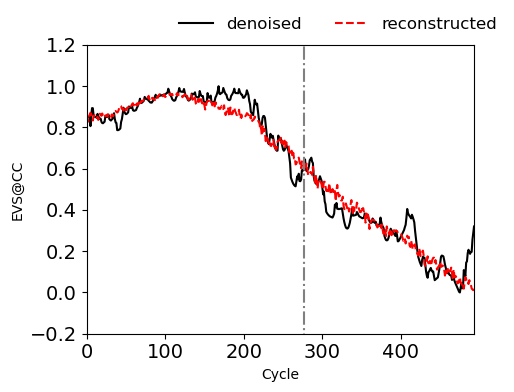

In [72]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,5]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI6']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

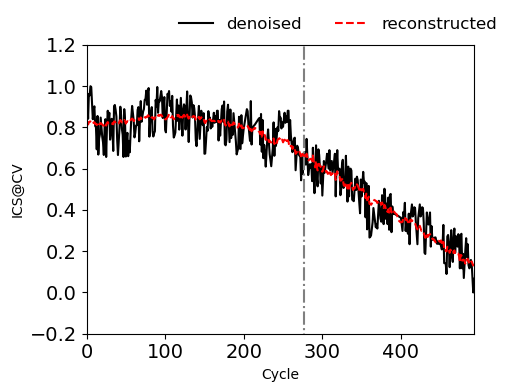

In [73]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,6]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI7']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ICS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

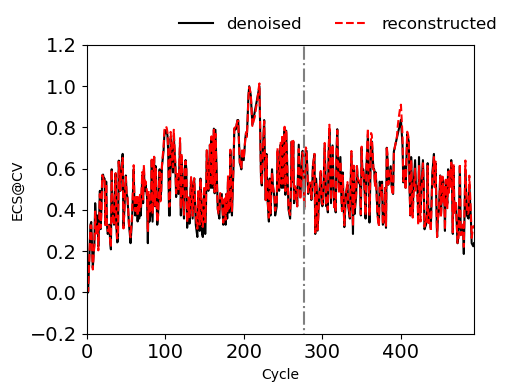

In [74]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,7]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI8']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ECS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

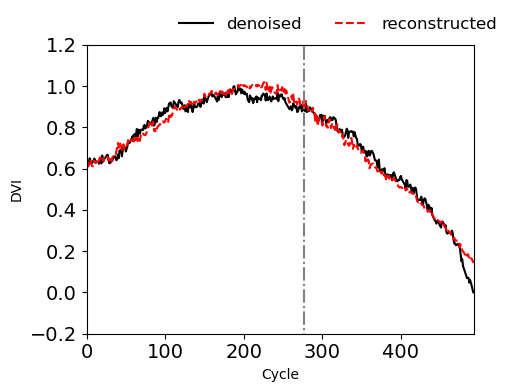

In [75]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,8]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI9']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("DVI")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

In [76]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

x=reconstructed
y=data['SOH']*100
print(x.shape)

x_train=x[:270,:]
y_train=y[:270]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_pred, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

(493, 9)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 5.592087020756969


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [77]:
x=reconstructed[:,:3]
y=data['SOH']*100
print(x.shape)

x_train=x[:270,:]
y_train=y[:270]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_mechanical, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_mechanical))

print("RMSE:", rmse)

(493, 3)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 46.38948112434396


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [78]:
x=reconstructed[:,3:]
y=data['SOH']*100

x_train=x[:270,:]
y_train=y[:270]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_Impedance, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_Impedance))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 4.184687215882781


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


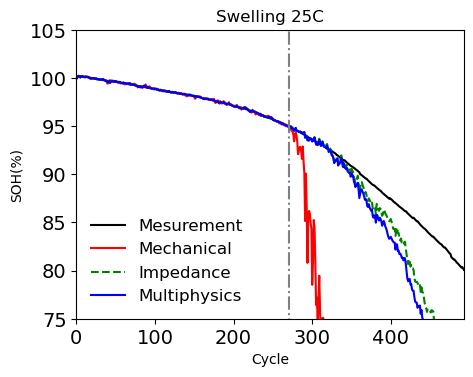

In [79]:
plt.figure(figsize=(5,3.75))
y_2= y_mechanical
y_4=y_pred
y_3=y_Impedance
x= np.arange(1, len(y) + 1)
y_soh=data['SOH']*100
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'r-',label='Mechanical')
plt.plot(x,y_3,'g--',label='Impedance')
plt.plot(x,y_4,'b-',label='Multiphysics')

plt.title("Swelling 25C")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(270,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()

